# Taller 1 - Temas en Microeconomía
### Jorge De León

## Punto 1. Simulación de monte carlo

In [23]:
#pip install pandas 
#pip install numpy
#pip install seaborn
#pip install scikit-learn
#pip install statsmodels

In [24]:
import pandas
import numpy 
import seaborn 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from statsmodels.graphics import tsaplots

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

### Simulación de montecarlo modelo 1

### $y = \beta _{0} + \beta _{1} x + \varepsilon $
### Donde: 
### - $ \beta _{0} = -3 $
### - $ \beta _{1} = 5 $
### - $ \varepsilon\sim N\left ( 0,100 \right ) $

#### Introducimos las variables del modelo y se crea la variable Y X

In [25]:
numpy.random.seed(12345) #Semilla para poder replicar
repeticiones = 2000
Obs = 500
Y = []
X = []
betas_gorro = []
beta_0 = -3
beta_1 = 5

# Creación de listas x y para formar el data frame
for i in range(Obs):
    Y.append(0)
    X.append(i+1)

#### Se reemplaza la variable Y por la forma del modelo y se hace la regresión

In [26]:
for z in range(repeticiones):
    for i in range(Obs):
        u  = numpy.random.normal(loc=0, scale=10)
        Y[i] = beta_0 + beta_1 * X[i] + u

    dic = {'Y' : Y, 'X': X}
    panel = pandas.DataFrame(data=dic) #Data Frame
    y = panel["Y"].values.reshape(-1, 1)
    x = panel["X"].values.reshape(-1, 1)

    reg1 = LinearRegression().fit(x, y)
    betas_gorro.append(float(reg1.coef_[0]))

#### Gráfica de los valores estimados de beta 1

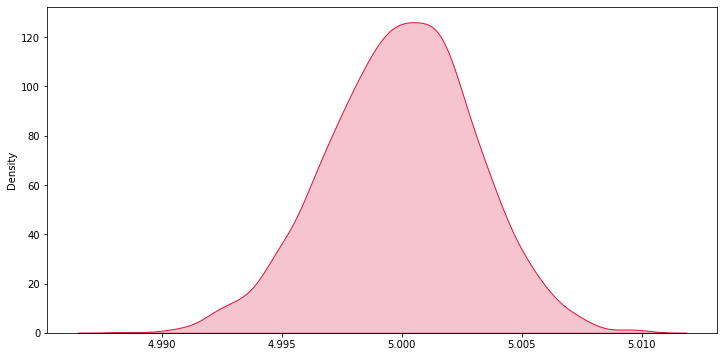

In [27]:
fig, ax = plt.subplots(figsize=(12, 6))
img1 = seaborn.kdeplot(x=betas_gorro, color="crimson", fill = True, ax=ax)

plt.show()

### Ahora aumentamos el número de muestras a 5000 

In [28]:
numpy.random.seed(12345) #Semilla para poder replicar
repeticiones_2 = 2000
Obs_2 = 5000
Y_2 = []
X_2 = []
betas_gorro_2 = []
#u  = numpy.random.normal(loc=0, scale=10) #Error con desviación estandar 10, varianza 100 y media 0
beta_0 = -3
beta_1 = 5

# Creación de listas x y para formar el data frame
for i in range(Obs_2):
    Y_2.append(0)
    X_2.append(i+1)

#### Corremos la nueva simulación

In [29]:
for z in range(repeticiones_2):
    for i in range(Obs_2):
        u  = numpy.random.normal(loc=0, scale=10)
        Y_2[i] = beta_0 + beta_1 * X_2[i] + u

    dic_2 = {'Y_2' : Y_2, 'X_2': X_2}
    panel = pandas.DataFrame(data=dic_2) #Data Frame
    y_2 = panel["Y_2"].values.reshape(-1, 1)
    x_2 = panel["X_2"].values.reshape(-1, 1)

    reg2 = LinearRegression().fit(x_2, y_2)
    betas_gorro_2.append(float(reg2.coef_[0]))

#### Gráfico de la distribución de los estimadores estimados para beta1

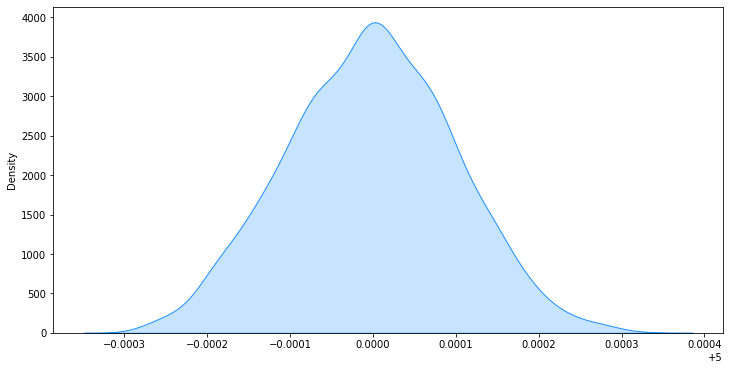

In [30]:
fig, ax = plt.subplots(figsize=(12, 6))
seaborn.kdeplot(x=betas_gorro_2, color="dodgerblue", fill = True, ax=ax)

plt.show()

#### Juntamos los dos gráficos

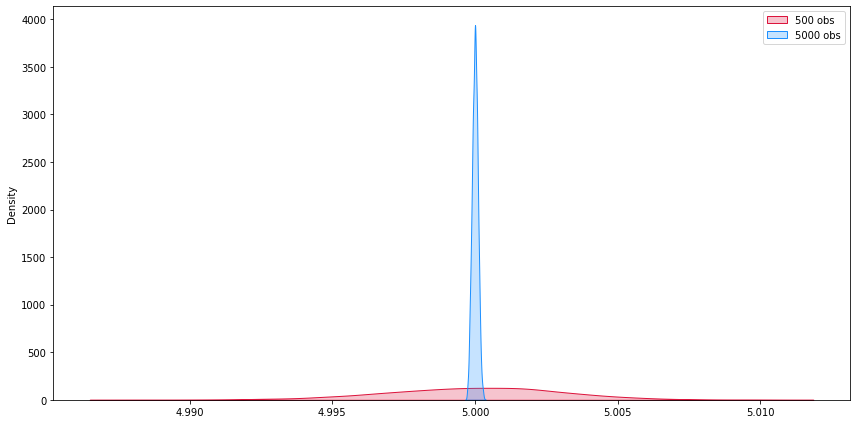

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))

fig1 = seaborn.kdeplot(x = betas_gorro,
            color='crimson', label='500 obs', fill=True, ax=ax)


fig2 = seaborn.kdeplot(x = betas_gorro_2,
            color='dodgerblue', label='5000 obs', fill=True, ax=ax)



ax.legend()
plt.tight_layout()
plt.show()

#### Conclusiones de las simulaciones

## Punto 2. Series de tiempo

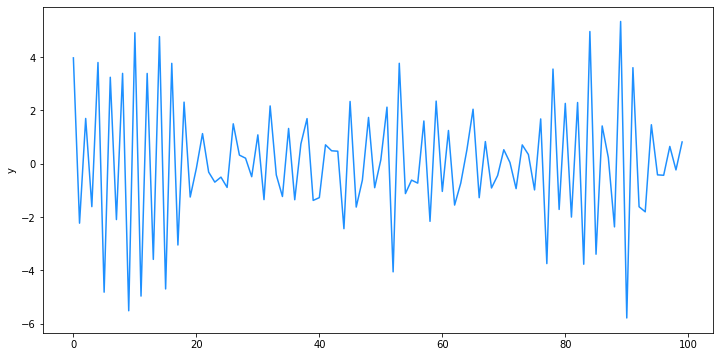

In [32]:
serie_tiempo = pandas.read_table('serie.txt', sep = "\t") #Cargamos la serie de tiempo

fig, ax = plt.subplots(figsize=(12, 6))
seaborn.lineplot(data=serie_tiempo['y'], color = "dodgerblue", ax=ax)

plt.show()


Visualmente se puede observar que tiene media igual a 0, pero no parece tener una varianza constante.

### Función de autocorrelación

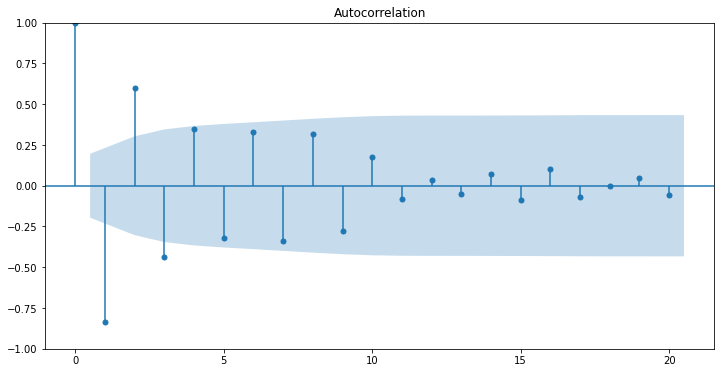

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))
acf_1 = tsaplots.plot_acf (serie_tiempo['y'], ax=ax)
plt.show ()

### Suponemos el siguiente proceso generador de datos: 
### $y_{t} = \alpha y_{t-1} + \varepsilon _{t}$

In [34]:
AR_1 = ARIMA(serie_tiempo['y'], order=(1,0,0))

estim = AR_1.fit()
estim.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -166.350
Date:                Thu, 09 Feb 2023   AIC                            338.700
Time:                        11:34:34   BIC                            346.515
Sample:                             0   HQIC                           341.863
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.070      0.008      0.993      -0.136       0.137
ar.L1         -0.8502      0.055    -15.438      0.000      -0.958      -0.742
sigma2         1.6101      0.247      6.519      0.000       1.126       2.094
===================================================================================
Ljung-Box (L1) (Q):                   9.22   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.00   Prob(JB):                         0.83
Heteroskedasticity (H):               1.35   Skew:                            -0.10
Prob(H) (two-sided):                  0.40   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Insertar tabla con los datos del modelo

### Supongamos otro modelo:

### $y_{t} = \alpha y_{t-1} + \varepsilon _{t} + \beta \varepsilon _{t-1}$

In [35]:
ARMA_1 = ARIMA(serie_tiempo['y'], order=(1,0,1))

estim2 = ARMA_1.fit()
estim2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -153.078
Date:                Thu, 09 Feb 2023   AIC                            314.157
Time:                        11:34:34   BIC                            324.577
Sample:                             0   HQIC                           318.374
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0085      0.022     -0.381      0.703      -0.052       0.035
ar.L1         -0.7077      0.085     -8.290      0.000      -0.875      -0.540
ma.L1         -0.6702      0.093     -7.212      0.000      -0.852      -0.488
sigma2         1.2251      0.198      6.186      0.000       0.837       1.613
===================================================================================
Ljung-Box (L1) (Q):                   0.28   Jarque-Bera (JB):                 0.59
Prob(Q):                              0.60   Prob(JB):                         0.74
Heteroskedasticity (H):               0.93   Skew:                             0.05
Prob(H) (two-sided):                  0.84   Kurtosis:                         2.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

#### Insertar tabla con los datos del modelo

### Supongamos otro modelo:

### $y_{t} = \alpha_{1} y_{t-1} + \alpha _{2}y_{t-2} + \varepsilon _{t}$

In [36]:
AR_2 = ARIMA(serie_tiempo['y'], order=(2,0,0))

estim3 = AR_2.fit()
estim3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -158.504
Date:                Thu, 09 Feb 2023   AIC                            325.009
Time:                        11:34:34   BIC                            335.429
Sample:                             0   HQIC                           329.226
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.047     -0.063      0.950      -0.095       0.089
ar.L1         -1.1776      0.099    -11.848      0.000      -1.372      -0.983
ar.L2         -0.3842      0.096     -3.982      0.000      -0.573      -0.195
sigma2         1.3718      0.236      5.816      0.000       0.910       1.834
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 1.23
Prob(Q):                              0.43   Prob(JB):                         0.54
Heteroskedasticity (H):               0.86   Skew:                             0.06
Prob(H) (two-sided):                  0.68   Kurtosis:                         2.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Supongamos otro modelo
### $y = \beta _{1}\varepsilon _{t-1} + \beta _{2} \varepsilon _{t-2} + \varepsilon _{t}$

In [37]:
MA_2 = ARIMA(serie_tiempo['y'], order=(0,0,2))

estim4 = MA_2.fit()
estim4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                 ARIMA(0, 0, 2)   Log Likelihood                -162.634
Date:                Thu, 09 Feb 2023   AIC                            333.268
Time:                        11:34:34   BIC                            343.688
Sample:                             0   HQIC                           337.485
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0049      0.036     -0.137      0.891      -0.075       0.065
ma.L1         -1.2605      0.091    -13.836      0.000      -1.439      -1.082
ma.L2          0.5505      0.095      5.806      0.000       0.365       0.736
sigma2         1.4870      0.237      6.262      0.000       1.022       1.952
===================================================================================
Ljung-Box (L1) (Q):                   2.05   Jarque-Bera (JB):                 0.39
Prob(Q):                              0.15   Prob(JB):                         0.82
Heteroskedasticity (H):               0.74   Skew:                            -0.03
Prob(H) (two-sided):                  0.39   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

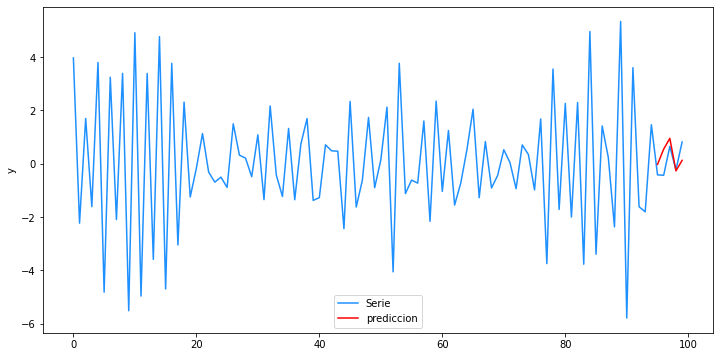

In [38]:
serie_tiempo['prediccion'] = estim2.predict(start=95)

fig, ax = plt.subplots(figsize=(12, 6))
seaborn.lineplot(data=serie_tiempo['y'], color = "dodgerblue", ax=ax, label = 'Serie')
seaborn.lineplot(data=serie_tiempo['prediccion'], color = 'red', ax=ax, label='prediccion')

plt.show()

#### MSPE

In [39]:
# Calculamos las diferencias entre el estimado y el original
diferencias = []

for i in range(95,100):
    valor_dif = serie_tiempo['prediccion'][i] - serie_tiempo['y'][i]
    diferencias.append(valor_dif)

In [40]:
sumatoria = 0
for i in range(len(diferencias)):
    sumatoria = sumatoria + diferencias[i]

sumatoria = sumatoria ** 2
sumatoria = sumatoria / len(diferencias)

print('Este es el MSPE:', sumatoria)


Este es el MSPE: 0.18100251755809202
